In [21]:
# DBSCAN

def dbscan(data,epsilon,min_point):
  def calc_dist(d,data,epsilon):
    ans=[]
    for i in range(len(data)):
      if np.linalg.norm(d-data[i])<epsilon:
        ans.append(i)
    return ans
  def scan(i,l):
    if visited[i]==False:
      visited[i]=True
      label[i]=l
      A=calc_dist(data[i],data,epsilon)
      if len(A)>=min_point:
        for a in A:
          if a!=i:
            scan(a,l)
  visited=[False for _ in range(len(data))]
  label=[-1 for _ in range(len(data))]
  l=-1
  for i in range(len(data)):
    if visited[i]==False and len(calc_dist(data[i],data,epsilon))>=min_point:
      l+=1
      scan(i,l)
  return label

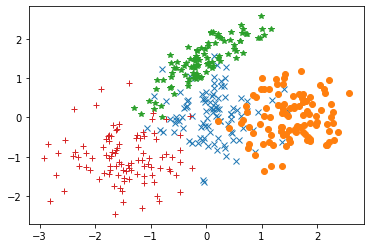

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

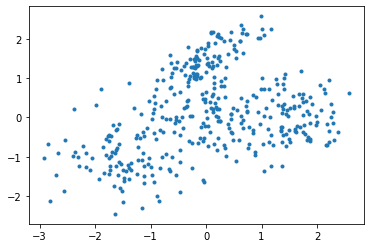

In [23]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

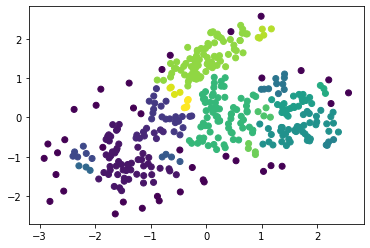

In [36]:
# Performing DBSCAN
epsilon=0.195
min_point=3
labels=np.array(dbscan(x,epsilon,min_point))+1
plt.scatter(x[:,0], x[:,1],c=labels)
plt.show()